In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sk
import seaborn as sns
#Pandas profiling library
# import ydata_profiling as pp.

In [104]:
# Extract Data
df = pd.read_csv('/Users/viktordyminskyi/Documents/vic/UCU/Data Science 2025 - 2027/ML/Practice 3/wfh_burnout_dataset.csv')
df

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,app_switches,sleep_hours,task_completion,isolation_index,fatigue_score,burnout_score,burnout_risk
0,129,Weekday,7.74,5.99,3,7,0,50,7.50,74.80,4,3.51,17.23,Low
1,24,Weekday,8.48,7.23,3,5,0,63,7.31,86.36,4,5.15,24.01,Low
2,147,Weekend,8.39,7.14,1,5,0,27,6.73,89.23,8,7.85,51.46,Medium
3,42,Weekday,12.48,12.23,4,1,1,89,6.55,64.47,5,10.00,55.50,Medium
4,99,Weekend,8.85,7.35,4,6,0,40,8.03,98.62,3,3.45,11.95,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,101,Weekend,7.93,6.43,1,6,0,22,7.75,73.67,4,2.57,13.16,Low
1996,114,Weekend,8.37,6.87,5,6,0,89,7.00,80.05,5,7.13,35.41,Medium
1997,49,Weekend,10.97,10.47,13,2,0,93,5.86,46.95,6,10.00,58.79,Medium
1998,9,Weekday,8.48,6.98,0,6,0,29,8.12,72.57,6,6.41,32.64,Low


In [ ]:
# Cheching Data (summary)
df.describe()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day_type           2000 non-null   str    
 1   work_hours         2000 non-null   float64
 2   screen_time_hours  2000 non-null   float64
 3   meetings_count     2000 non-null   int64  
 4   breaks_taken       2000 non-null   int64  
 5   after_hours_work   2000 non-null   int64  
 6   app_switches       2000 non-null   int64  
 7   sleep_hours        2000 non-null   float64
 8   task_completion    2000 non-null   float64
 9   isolation_index    2000 non-null   int64  
 10  fatigue_score      2000 non-null   float64
 11  burnout_score      2000 non-null   float64
 12  burnout_risk       2000 non-null   str    
dtypes: float64(6), int64(5), str(2)
memory usage: 203.3 KB


In [ ]:
# Clean Data: No need after the checking
# df = df.drop(columns= 'user_id')
# num_columns = df.select_dtypes(include='number').columns
# obj_columns = df.select_dtypes(include='object').columns

# df[num_columns].fillna(df[num_columns].mean)
# df[obj_columns].fillna(df[obj_columns].mode)


/var/folders/9d/mkfhbv9x1bn_x3nmn0l72jh80000gn/T/ipykernel_52326/1061158464.py:4: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  obj_columns = df.select_dtypes(include='object').columns


In [102]:
burnout_risk_grouping = df.groupby(by='burnout_risk').agg(Mean_breaks = ('breaks_taken','mean')).reset_index()
burnout_risk_grouping = burnout_risk_grouping.sort_values('Mean_breaks', ascending=False)
burnout_risk_grouping

,burnout_risk,Mean_breaks
1,Low,5.518155
2,Medium,4.817319
0,High,3.246377


From here we might assume that there is a corelation between people taking breaks and burnout_risk

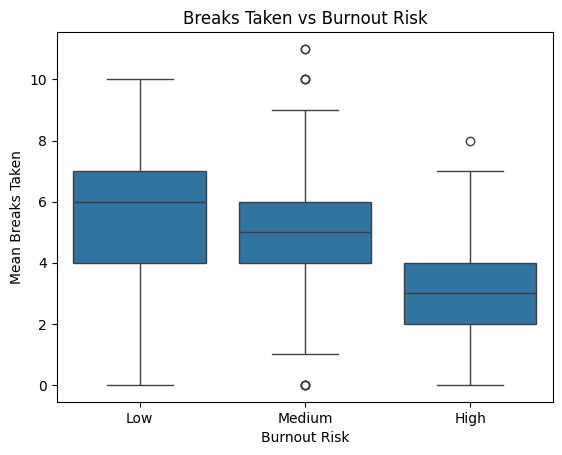

In [103]:
sns.boxplot(x='burnout_risk', y='breaks_taken', data=df)
plt.title('Breaks Taken vs Burnout Risk')
plt.xlabel('Burnout Risk')
plt.ylabel('Mean Breaks Taken')
plt.show()

In [ ]:
# It would be interesting to create a model to predict the possibility of an employee burning out
